In [1]:
# load libraries
library(tidyr)
library(dplyr)
library(readr)
library(ggplot2)
library(caret)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'readr' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"

In [2]:
# get final elo ratings for 2019 including playoffs
nfl_elo <- read_csv('final_elo_2019.csv')

start <- nfl_elo %>%
  select(team, elo) %>%
  arrange(desc(elo))

start

Parsed with column specification:
cols(
  week = col_double(),
  team = col_character(),
  elo = col_double()
)


team,elo
KC,1744.771
BAL,1705.146
NO,1662.208
SF,1653.178
TEN,1646.162
GB,1621.188
NE,1619.797
MIN,1604.210
LAR,1569.851
SEA,1567.849


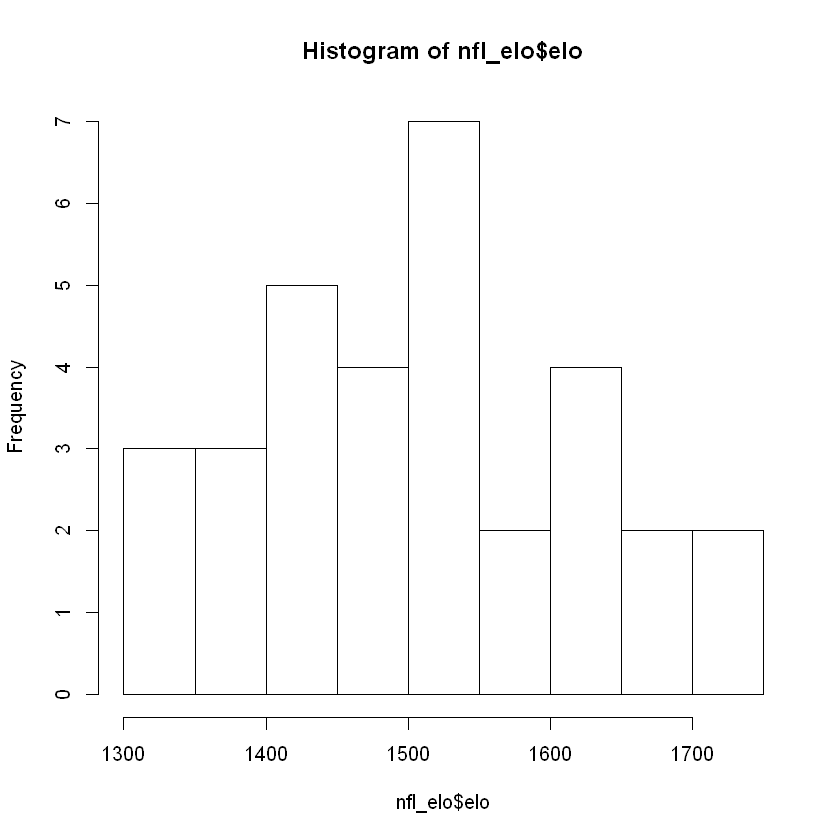

In [3]:
hist(nfl_elo$elo, breaks=9)

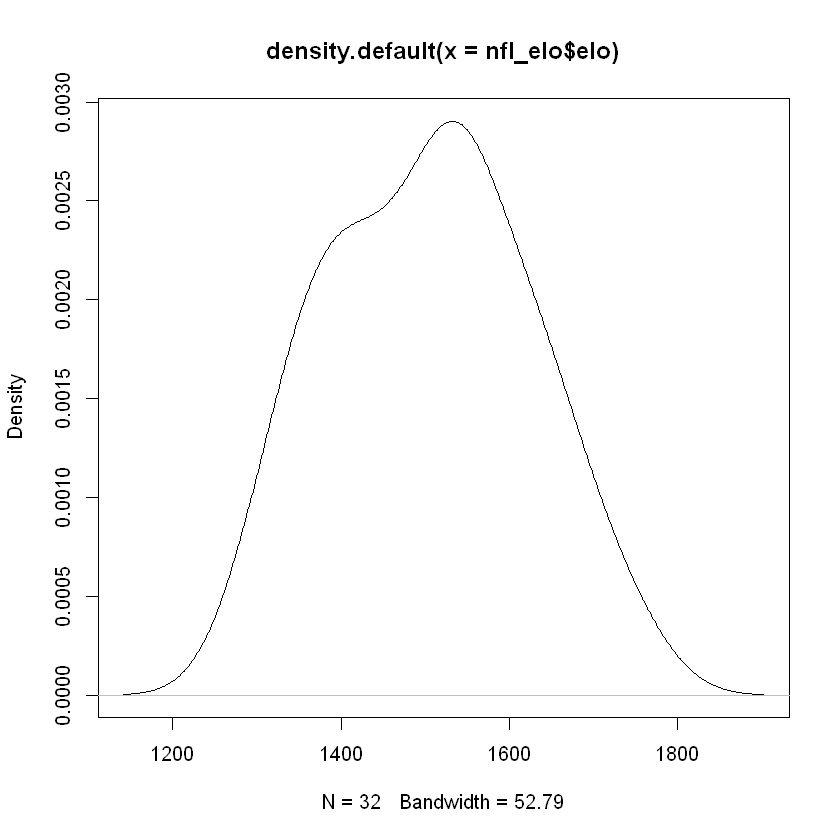

In [4]:
# Kernel Density Plot
d <- density(nfl_elo$elo) # returns the density data
plot(d) # plots the results

In [5]:
mean(nfl_elo$elo)

[1] 1504.991

In [6]:
# get 2020 regular season schedule
nfl_sch <- read_csv('nfl_elo_week7.csv')

head(nfl_sch)
tail(nfl_sch)

Parsed with column specification:
cols(
  week = col_double(),
  date = col_character(),
  team1 = col_character(),
  team2 = col_character(),
  score1 = col_double(),
  score2 = col_double()
)


week,date,team1,team2,score1,score2
1,9/10/2020,KC,HOU,34,20
1,9/13/2020,JAX,IND,27,20
1,9/13/2020,DET,CHI,23,27
1,9/13/2020,NE,MIA,21,11
1,9/13/2020,CAR,OAK,30,34
1,9/13/2020,BAL,CLE,38,6


week,date,team1,team2,score1,score2
17,1/3/2021,CAR,NO,NA,NA
17,1/3/2021,DET,MIN,NA,NA
17,1/3/2021,CHI,GB,NA,NA
17,1/3/2021,SF,SEA,NA,NA
17,1/3/2021,DEN,OAK,NA,NA
17,1/3/2021,LAR,ARI,NA,NA


In [7]:
nfl_sch_wk7 <- nfl_sch %>%
  filter(week <= 7)

In [8]:
# add column to determine winner of game (use score to determine)
nfl_sch_wk7 <- nfl_sch_wk7 %>%
   mutate(outcome = case_when(
     score1 > score2 ~ 1, # 1 = home team win
     TRUE ~ 0  # 0 = home team loss or tie
   ))

In [9]:
nfl_sch_wk7

week,date,team1,team2,score1,score2,outcome
1,9/10/2020,KC,HOU,34,20,1
1,9/13/2020,JAX,IND,27,20,1
1,9/13/2020,DET,CHI,23,27,0
1,9/13/2020,NE,MIA,21,11,1
1,9/13/2020,CAR,OAK,30,34,0
1,9/13/2020,BAL,CLE,38,6,1
1,9/13/2020,ATL,SEA,25,38,0
1,9/13/2020,BUF,NYJ,27,17,1
1,9/13/2020,MIN,GB,34,43,0
1,9/13/2020,WSH,PHI,27,17,1


In [10]:
# calculate the win probabilities 
calc_expected_score <- function(team_rating, opp_team_rating) {
  return(1 / (1 + 10^((opp_team_rating - team_rating) / 400)))
}


In [11]:
# calculate new elo ratings based on actual winner
calc_new_rating <- function(team_rating, observed_score, expected_score,
                            k_factor = 20) {
  return(team_rating + k_factor * (observed_score - expected_score))
}

In [12]:
nfl_results <- data.frame()

In [13]:
# determine winners in 2020 schedule to date (week7)
# loop through schedule thru week 7
for (game_i in 1:nrow(nfl_sch_wk7)) {
    
  # Week number?
  week <- nfl_sch_wk7$week[game_i]
  # Which teams are we looking at?
  team1 <- nfl_sch_wk7$team1[game_i]
  team2 <- nfl_sch_wk7$team2[game_i]
  score1 <- nfl_sch_wk7$score1[game_i]
  score2 <- nfl_sch_wk7$score2[game_i]
  # Who was the winning team (1 = team1 = home team, 0 = team2 = away team, 0.5 = tie)
  team1_outcome <- nfl_sch_wk7$outcome[game_i]
    
# OPTION 2
  # What was each team's rating from their latest game?
  team1_pre <- nfl_elo %>%
    filter(team ==  team1) %>%
    arrange(desc(week)) %>%
    slice(1) %>%
    pull(elo)
  team2_pre <- nfl_elo %>%
    filter(team ==  team2) %>%
    arrange(desc(week)) %>%
    slice(1) %>%
    pull(elo)

 
# OPTION 2:
  # separate out elo rating function from expected score since I want to see the results individually
  # calculate each team's probability of winning with +100 for home field advantage
  team1_prob <- calc_expected_score((team1_pre + 35), team2_pre)
  team2_prob <- calc_expected_score(team2_pre, (team1_pre + 35))

  if (team1_prob > 0.50) {
      pred_outcome <- 1.0
  } else if (team1_prob <= .50) {
      pred_outcome <- 0.0
  }

    
  # adjust for actual game results thru week 7  
  # calcualte elo ratings after the game  
  team1_post <- calc_new_rating(team1_pre, team1_outcome, team1_prob) 
  team2_post <- calc_new_rating(team2_pre, (1 - team1_outcome), team2_prob)
    
   
  # create tibble to store each games results
  results <- tibble(week = rep(week),
                    team1 = team1,
                    team2 = team2,
                    score1 = score1,
                    score2 = score2,
                    elo1_pre = team1_pre,
                    elo2_pre = team2_pre,
                    elo1_prob = team1_prob,
                    elo2_prob = team2_prob,
                    elo1_post = team1_post,
                    elo2_post = team2_post,
                    pred_outcome = pred_outcome,
                    actual_outcome = team1_outcome,
                    )   

    
  nfl_results <- nfl_results %>%
    bind_rows(results)
 
    
  # add new elo to the elo_ratings table each team's new ratings for the week:
  updated_ratings <- tibble(week = rep(week, 2),
                          team = c(team1, team2),
                          elo = c(team1_post, team2_post)
                           )
            
  nfl_elo <- nfl_elo %>%
    bind_rows(updated_ratings)
    
}
 

In [14]:
nfl_results <- nfl_results %>%
 # select(week, team1, team2, pred_outcome, actual_outcome) %>%
  mutate(correct = case_when(
     pred_outcome == actual_outcome ~ 1, 
     TRUE ~ 0))

In [15]:
nfl_results

week,team1,team2,score1,score2,elo1_pre,elo2_pre,elo1_prob,elo2_prob,elo1_post,elo2_post,pred_outcome,actual_outcome,correct
1,KC,HOU,34,20,1744.771,1539.395,0.7995869,0.2004131,1748.779,1535.387,1,1,1
1,JAX,IND,27,20,1405.254,1471.482,0.4551795,0.5448205,1416.150,1460.586,0,1,0
1,DET,CHI,23,27,1354.353,1534.347,0.3026627,0.6973373,1348.300,1540.400,0,0,1
1,NE,MIA,21,11,1619.797,1368.379,0.8387224,0.1612776,1623.022,1365.153,1,1,1
1,CAR,OAK,30,34,1374.103,1403.489,0.5080788,0.4919212,1363.942,1413.651,1,0,0
1,BAL,CLE,38,6,1705.146,1408.300,0.8710485,0.1289515,1707.725,1405.721,1,1,1
1,ATL,SEA,25,38,1549.273,1567.849,0.5236195,0.4763805,1538.801,1578.321,1,0,0
1,BUF,NYJ,27,17,1514.532,1434.595,0.6596267,0.3403733,1521.339,1427.787,1,1,1
1,MIN,GB,34,43,1604.210,1621.188,0.5259127,0.4740873,1593.692,1631.706,1,0,0
1,WSH,PHI,27,17,1300.236,1540.341,0.2349300,0.7650700,1315.538,1525.040,0,1,0


In [16]:
nfl_sch_wk8 <- nfl_sch %>%
  filter(week == 8)

nfl_results_wk8 <- data.frame()

In [17]:
# add column to determine winner of game (use score to determine)
nfl_sch_wk8 <- nfl_sch_wk8 %>%
   mutate(outcome = case_when(
     score1 > score2 ~ 1, # 1 = home team win
     TRUE ~ 0  # 0 = home team loss or tie
   ))

In [18]:
# determine week 8 winners
# loop through schedule thru week 7
for (game_i in 1:nrow(nfl_sch_wk8)) {
    
  # Week number?
  week <- nfl_sch_wk8$week[game_i]
  # Which teams are we looking at?
  team1 <- nfl_sch_wk8$team1[game_i]
  team2 <- nfl_sch_wk8$team2[game_i]
  score1 <- nfl_sch_wk8$score1[game_i]
  score2 <- nfl_sch_wk8$score2[game_i]
  # Who was the winning team (1 = team1 = home team, 0 = team2 = away team, 0.5 = tie)
  team1_outcome <- nfl_sch_wk8$outcome[game_i]
    
# OPTION 2
  # What was each team's rating from their latest game?
  team1_pre <- nfl_elo %>%
    filter(team ==  team1) %>%
    arrange(desc(week)) %>%
    slice(1) %>%
    pull(elo)
  team2_pre <- nfl_elo %>%
    filter(team ==  team2) %>%
    arrange(desc(week)) %>%
    slice(1) %>%
    pull(elo)

 
# OPTION 2:
  # separate out elo rating function from expected score since I want to see the results individually
  # calculate each team's probability of winning with +100 for home field advantage
  team1_prob <- calc_expected_score((team1_pre + 100), team2_pre)
  team2_prob <- calc_expected_score(team2_pre, (team1_pre + 100))

  if (team1_prob > 0.50) {
      pred_outcome <- 1.0
  } else if (team1_prob <= .50) {
      pred_outcome <- 0.0
  }

    
  # adjust for actual game results thru week 7  
  # calcualte elo ratings after the game  
  team1_post <- calc_new_rating(team1_pre, team1_outcome, team1_prob) 
  team2_post <- calc_new_rating(team2_pre, (1 - team1_outcome), team2_prob)
    
   
  # create tibble to store each games results
  results <- tibble(week = rep(week),
                    team1 = team1,
                    team2 = team2,
                    elo1_pre = team1_pre,
                    elo2_pre = team2_pre,
                    elo1_prob = team1_prob,
                    elo2_prob = team2_prob,
                    elo1_post = team1_post,
                    elo2_post = team2_post,
                    pred_outcome = pred_outcome,
                    )   

    
  nfl_results_wk8 <- nfl_results_wk8 %>%
    bind_rows(results)

    
}
 

In [19]:
nfl_results_wk8

week,team1,team2,elo1_pre,elo2_pre,elo1_prob,elo2_prob,elo1_post,elo2_post,pred_outcome
8,CAR,ATL,1386.940,1497.346,0.4850293,0.51497067,1377.239,1507.046,0
8,CIN,TEN,1320.090,1661.744,0.1992366,0.80076340,1316.105,1665.729,0
8,KC,NYJ,1759.215,1378.309,0.9409398,0.05906022,1740.397,1397.128,1
8,CLE,OAK,1445.080,1426.462,0.6643670,0.33563301,1431.792,1439.750,1
8,GB,MIN,1645.924,1560.133,0.7445015,0.25549845,1631.034,1575.023,1
8,BUF,NE,1542.048,1587.059,0.5784817,0.42151834,1530.478,1598.628,1
8,MIA,LAR,1392.304,1584.321,0.3705891,0.62941092,1384.892,1591.733,0
8,DET,IND,1381.616,1488.320,0.4903531,0.50964693,1371.809,1498.127,0
8,BAL,PIT,1713.531,1566.865,0.8053263,0.19467365,1697.424,1582.972,1
8,DEN,LAC,1485.822,1439.076,0.6994620,0.30053805,1471.833,1453.065,1


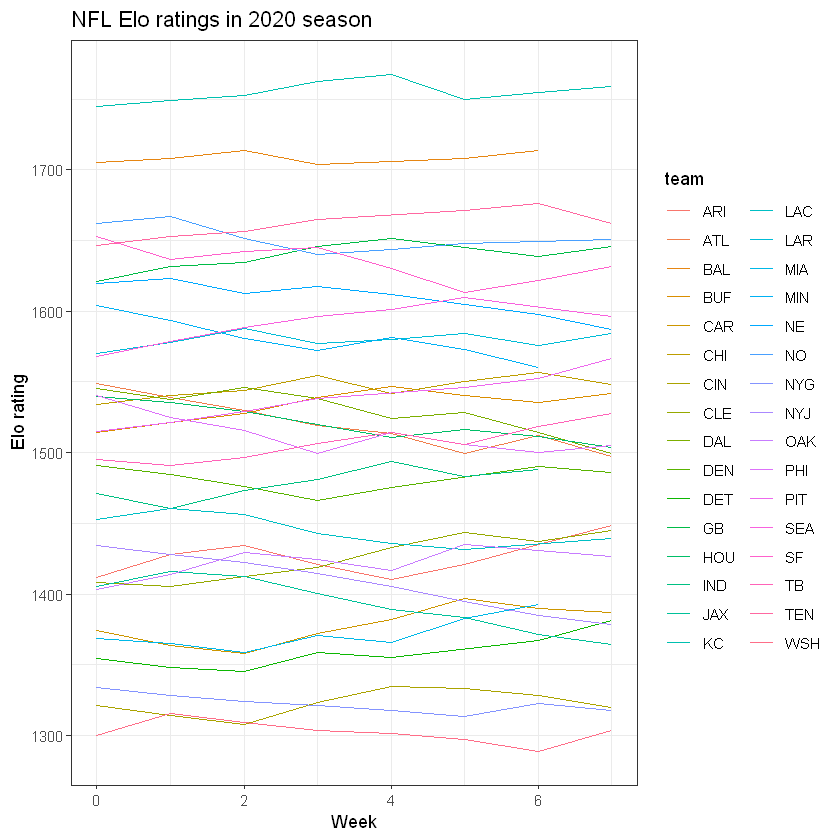

In [20]:
nfl_elo %>%
  ggplot(aes(x = week, y = elo, color = team)) +
  geom_line() +
  theme_bw() +
  labs(x = "Week", y = "Elo rating",
       title = "NFL Elo ratings in 2020 season")

Parsed with column specification:
cols(
  team = col_character(),
  abbr = col_character(),
  primary = col_character(),
  secondary = col_character(),
  tertiary = col_character(),
  quaternary = col_character(),
  division = col_character()
)

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



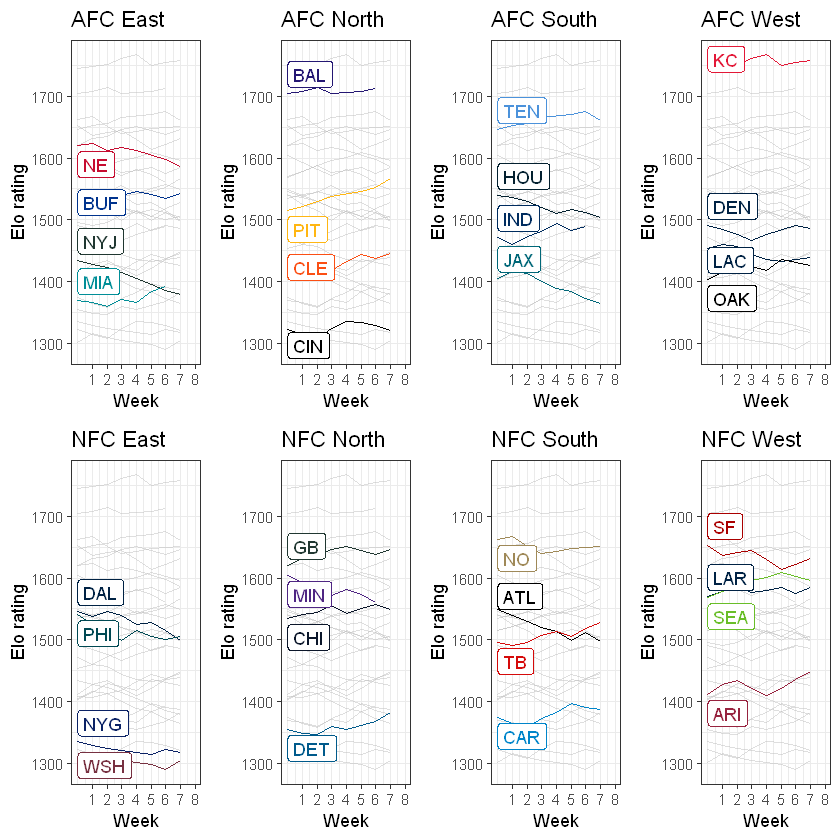

In [21]:
library(forcats)

# First read in the team colors data from the website:
nfl_team_colors <- read_csv("nfl_team_colors.csv")
nfl_team_colors <- nfl_team_colors %>%
  filter(abbr %in% unique(nfl_elo$team)) %>%
  mutate(primary = ifelse(abbr %in% c("OAK", "PIT", "SEA", "TEN",
                                         "JAX", "NE", "ATL"), 
                          secondary, primary))

# Create a dataset that has each team's initial Elo rating
nfl_team_start <- nfl_elo %>%
  filter(week == 0) %>%
  inner_join(nfl_team_colors, by = c("team" = "abbr")) %>%
  arrange(desc(elo))

 # Need ggrepel:
library(ggrepel)

division_plots <- lapply(sort(unique(nfl_team_start$division)),
                         function(nfl_division) {
                           
                           # Pull out the teams in the division
                           division_teams <- nfl_team_start %>%
                             filter(division == nfl_division) %>%
                             mutate(team = fct_reorder(team, desc(elo)))
                           
                           # Get the Elo ratings data just for these teams:
                           division_data <- nfl_elo %>%
                             filter(team %in% division_teams$team) %>%
                             mutate(team = factor(team,
                                                  levels = levels(division_teams$team))) %>%
                             # Make text labels for them:
                             mutate(team_label = if_else(week == min(week),
                                                         as.character(team), 
                                                         NA_character_))

                           # Now make the full plot
                           nfl_elo %>%
                             # Plot all of the other teams as gray lines:
                             filter(!(team %in% division_teams$team)) %>%
                             ggplot(aes(x = week, y = elo, group = team)) +
                             geom_line(color = "gray", alpha = 0.5) +
                             # But display the division teams with their colors:
                             geom_line(data = division_data,
                                       aes(x = week, y = elo, group = team,
                                           color = team)) +
                             geom_label_repel(data = division_data,
                                              aes(label = team_label,
                                                  color = team), nudge_x = 1, na.rm = TRUE,
                                              direction = "y") +
                             scale_color_manual(values = division_teams$primary, guide = FALSE) +
                             scale_x_continuous(limits = c(0, 8),
                                                breaks = c(1:8)) +
                             theme_bw() +
                             labs(x = "Week", y = "Elo rating",
                                  title = paste0(nfl_division)) 
                         })
                                                    
# Display the grid of plots with cowplot
library(cowplot)
plot_grid(plotlist = division_plots, ncol = 4, align = "hv")

In [22]:
nfl_elo %>%
  filter(week==7) %>%
  arrange(desc(elo))

week,team,elo
7,KC,1759.215
7,TEN,1661.744
7,NO,1650.916
7,GB,1645.924
7,SF,1631.944
7,SEA,1596.038
7,NE,1587.059
7,LAR,1584.321
7,PIT,1566.865
7,CHI,1548.311


In [23]:
top5 <- nfl_elo %>%
  filter(week == 7) %>%
  arrange(desc(elo)) %>%
  top_n(5)

top5


Selecting by elo


week,team,elo
7,KC,1759.215
7,TEN,1661.744
7,NO,1650.916
7,GB,1645.924
7,SF,1631.944


In [24]:
predicted <- factor(nfl_results$pred_outcome)
levels(predicted) <- c("Loss", "Win")
predicted <- ordered(predicted, levels = c("Win", "Loss"))


actual <- factor(nfl_results$actual_outcome)
levels(actual) <- c("Loss", "Win")
actual <- ordered(actual, levels = c('Win', 'Loss'))

#factor(x = character(), levels = sort(unique.default(x), na.last = TRUE),
 #      labels = levels, exclude = NA, ordered = is.ordered(x))



In [25]:
cm <- confusionMatrix(predicted, actual)

cm

Confusion Matrix and Statistics

          Reference
Prediction Win Loss
      Win   41   25
      Loss  12   27
                                          
               Accuracy : 0.6476          
                 95% CI : (0.5483, 0.7384)
    No Information Rate : 0.5048          
    P-Value [Acc > NIR] : 0.002195        
                                          
                  Kappa : 0.2935          
                                          
 Mcnemar's Test P-Value : 0.048520        
                                          
            Sensitivity : 0.7736          
            Specificity : 0.5192          
         Pos Pred Value : 0.6212          
         Neg Pred Value : 0.6923          
             Prevalence : 0.5048          
         Detection Rate : 0.3905          
   Detection Prevalence : 0.6286          
      Balanced Accuracy : 0.6464          
                                          
       'Positive' Class : Win             
                           

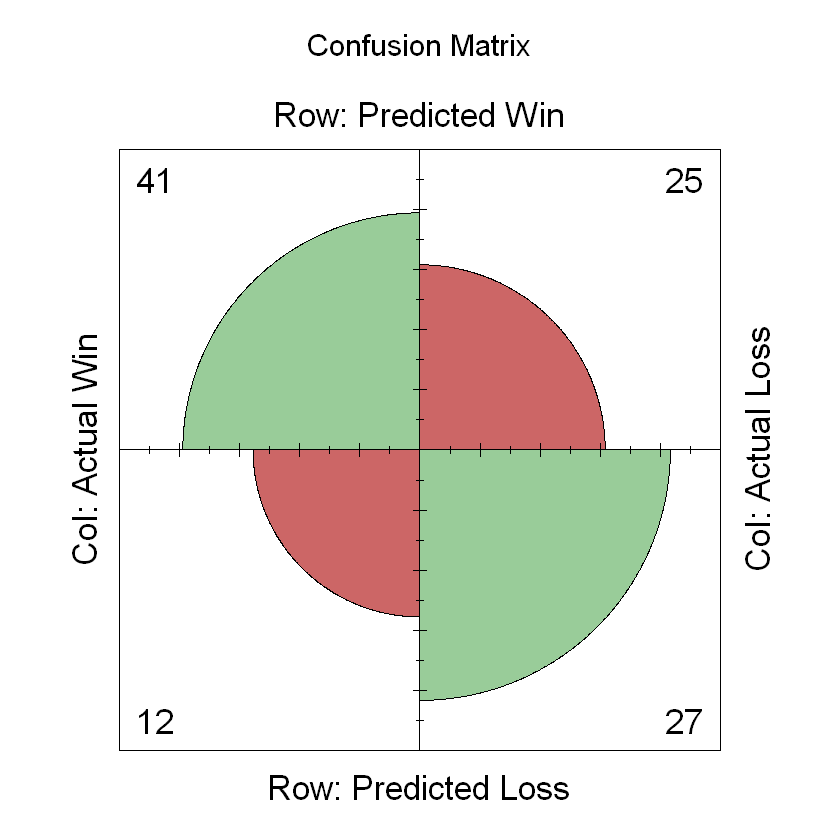

In [30]:
ctable <- as.table(matrix(c(41, 25, 12, 27), nrow = 2, byrow = TRUE))


# set the column and row names
colnames(ctable) <- c("Actual Win", "Actual Loss")  
rownames(ctable) <- c("Predicted Win", "Predicted Loss") 

fourfoldplot(ctable, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")
